<a href="https://colab.research.google.com/github/RunzheZ59/Runzhe-Zhang/blob/main/Final_project_2022_summer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
s#set up
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

df = pd.read_csv("covid.csv")

df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020/2/24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020/2/25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020/2/26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020/2/27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020/2/28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205458,ZWE,Africa,Zimbabwe,2022/7/27,256315.0,31.0,18.286,5574.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
205459,ZWE,Africa,Zimbabwe,2022/7/28,256336.0,21.0,17.000,5576.0,2.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
205460,ZWE,Africa,Zimbabwe,2022/7/29,256376.0,40.0,22.714,5577.0,1.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
205461,ZWE,Africa,Zimbabwe,2022/7/30,256376.0,0.0,18.571,5577.0,0.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [ ]:
# Intro: time serious data is difficult predict as it has Chain effect. a wrong prediction will affect the next one.
# So i decided to use three methods to solve the problem.(traditional time series model, polynomial regression, machine learning model)

In [ ]:
# filter NA value in "new_cases" column
df = df[df['new_cases'].notna()]
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020/2/24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020/2/25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020/2/26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020/2/27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020/2/28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205458,ZWE,Africa,Zimbabwe,2022/7/27,256315.0,31.0,18.286,5574.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
205459,ZWE,Africa,Zimbabwe,2022/7/28,256336.0,21.0,17.000,5576.0,2.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
205460,ZWE,Africa,Zimbabwe,2022/7/29,256376.0,40.0,22.714,5577.0,1.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
205461,ZWE,Africa,Zimbabwe,2022/7/30,256376.0,0.0,18.571,5577.0,0.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [ ]:
#sort the value by date of China(CHN)
China_df = df[df['iso_code'] == 'CHN'].sort_values('date')
China_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
37893,CHN,Asia,China,2020/1/23,639.0,92.0,NaN,18.0,1.0,NaN,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
37894,CHN,Asia,China,2020/1/24,916.0,277.0,NaN,26.0,8.0,NaN,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
37895,CHN,Asia,China,2020/1/25,1399.0,483.0,NaN,42.0,16.0,NaN,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
37896,CHN,Asia,China,2020/1/26,2062.0,663.0,NaN,56.0,14.0,NaN,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
37897,CHN,Asia,China,2020/1/27,2863.0,801.0,NaN,82.0,26.0,NaN,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38787,CHN,Asia,China,2022/7/5,890590.0,435.0,311.571,5226.0,0.0,0.0,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
38788,CHN,Asia,China,2022/7/6,890948.0,358.0,343.143,5226.0,0.0,0.0,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
38789,CHN,Asia,China,2022/7/7,891314.0,366.0,379.571,5226.0,0.0,0.0,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
38790,CHN,Asia,China,2022/7/8,891800.0,486.0,438.714,5226.0,0.0,0.0,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN


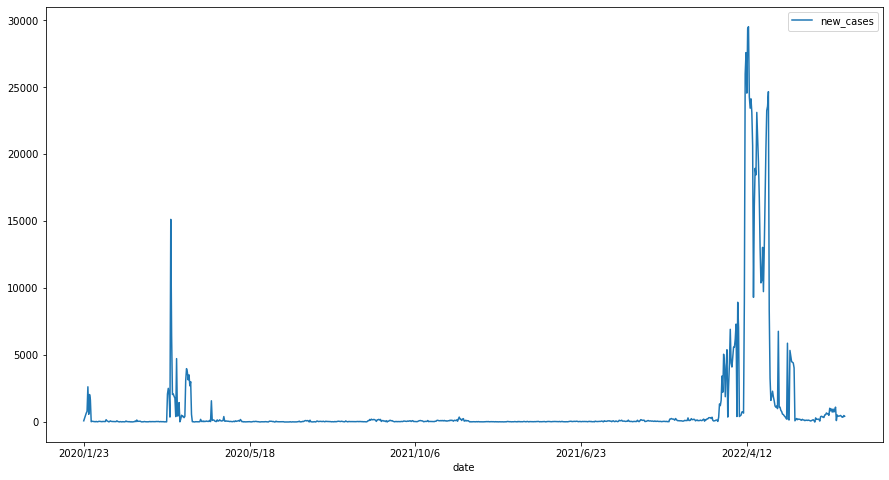

In [ ]:
#make a plot about the new_cases by date in China
China_df.plot(x = 'date', y = 'new_cases',figsize=(15, 8))
plt.show()

In [ ]:
#method 1 traditional time series model, such as arima(non-seasonality) or sarima(seasonnality),with trend and seasonality.

#however this method is not appropriate for our data because our data looks random and have no obvious trend or seasonality.

In [ ]:
#keeps the data from 2022/2/1-2022/7/1
CHN2021_df = China_df[(China_df['date'] > '2022/2/1') & (China_df['date'] < '2022/7/1')]
CHN2021_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
38642,CHN,Asia,China,2022/2/10,121095.0,127.0,107.143,4636.0,0.0,0.0,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
38643,CHN,Asia,China,2022/2/11,121250.0,155.0,118.286,4636.0,0.0,0.0,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
38644,CHN,Asia,China,2022/2/12,121348.0,98.0,118.571,4636.0,0.0,0.0,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
38645,CHN,Asia,China,2022/2/13,121460.0,112.0,118.857,4636.0,0.0,0.0,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
38646,CHN,Asia,China,2022/2/14,121570.0,110.0,113.000,4636.0,0.0,0.0,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38757,CHN,Asia,China,2022/6/5,884629.0,309.0,153.857,5226.0,0.0,0.0,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
38758,CHN,Asia,China,2022/6/6,884828.0,199.0,154.429,5226.0,0.0,0.0,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
38759,CHN,Asia,China,2022/6/7,885031.0,203.0,161.286,5226.0,0.0,0.0,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
38760,CHN,Asia,China,2022/6/8,885249.0,218.0,179.143,5226.0,0.0,0.0,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN


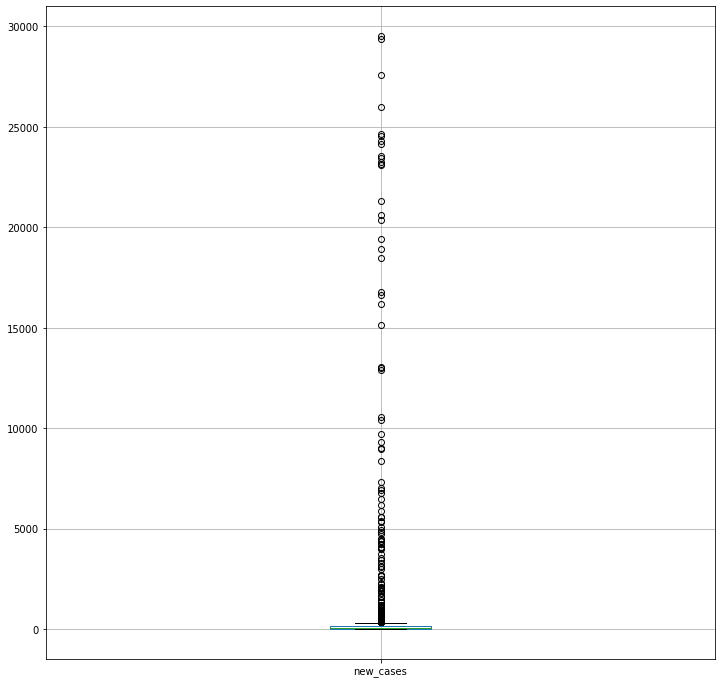

In [ ]:
#draw a bar plot to see the distribution
numeric_col = ['new_cases']
China_df.boxplot(numeric_col,figsize=(12, 12))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f118cbe0c10>]],
      dtype=object)

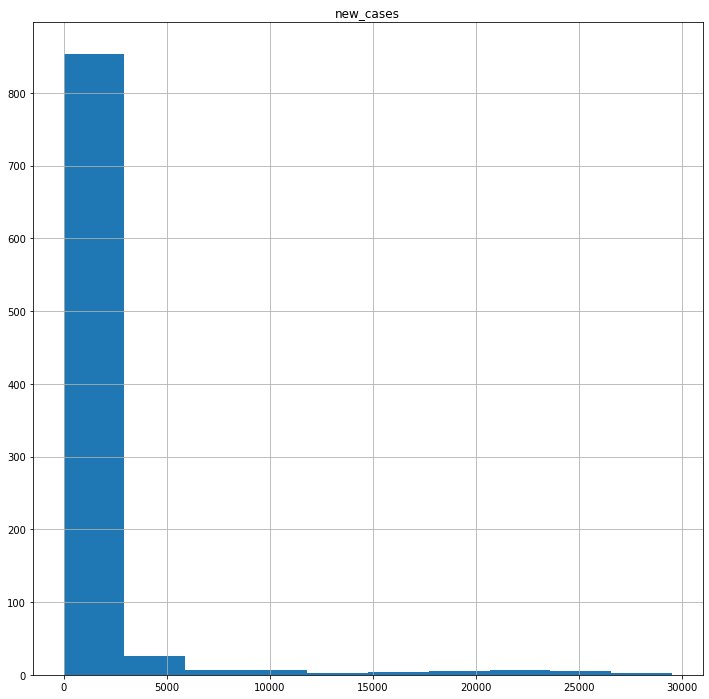

In [ ]:
# bar plot is not clear enough, so then use a histogram.
China_df.hist(numeric_col,figsize=(12, 12))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


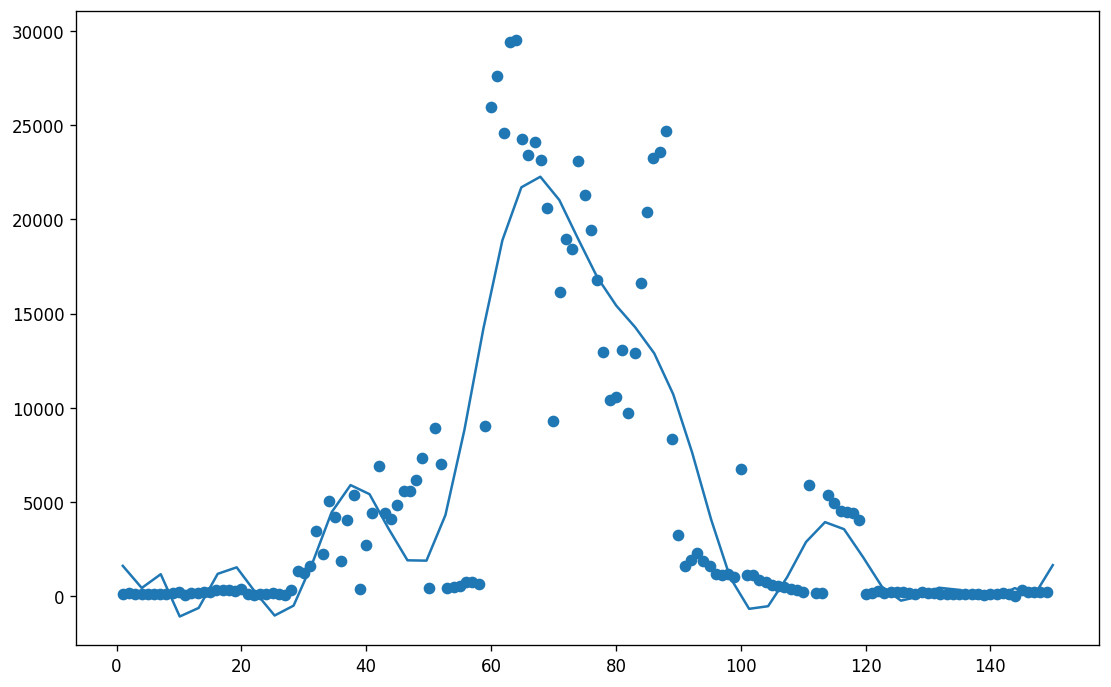

In [ ]:
# method 2 polynomial regression
import numpy
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(11, 7), dpi=120)
x = list(range(1,CHN2021_df.shape[0]+1))
y = CHN2021_df['new_cases'].to_list()
# I fitted a polynomial regresssion with multiple degrees from five to thirty.
# still does not look like polynomial. 
mymodel = numpy.poly1d(numpy.polyfit(x, y, 22))

myline = numpy.linspace(1, CHN2021_df.shape[0]+1)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show() 

In [ ]:
#use the model we get do prediction(multiple degrees)
#But all of them gives the prediction of negative values. Which does not make sense.
a = list(range(CHN2021_df.shape[0]+1,301))
predict1 = mymodel(a)
predict1

array([ 1.65031409e+03,  3.64558858e+03,  5.24722211e+03,  2.94619772e+03,
       -1.13569624e+04, -5.39650510e+04, -1.55041273e+05, -3.67199267e+05,
       -7.78246307e+05, -1.52967575e+06, -2.84305983e+06, -5.05709792e+06,
       -8.67897779e+06, -1.44546333e+07, -2.34638920e+07, -3.72479821e+07,
       -5.79788963e+07, -8.86824783e+07, -1.33530026e+08, -1.98216703e+08,
       -2.90449433e+08, -4.20571965e+08, -6.02361147e+08, -8.54035648e+08,
       -1.19952735e+09, -1.67007603e+09, -2.30622030e+09, -3.16027248e+09,
       -4.29938230e+09, -5.80931454e+09, -7.79908943e+09, -1.04066626e+10,
       -1.38058529e+10, -1.82147658e+10, -2.39060006e+10, -3.12189845e+10,
       -4.05748307e+10, -5.24941887e+10, -6.76186296e+10, -8.67362021e+10,
       -1.10811893e+11, -1.41023846e+11, -1.78806330e+11, -2.25900593e+11,
       -2.84414914e+11, -3.56895383e+11, -4.46409127e+11, -5.56641995e+11,
       -6.92012983e+11, -8.57808009e+11, -1.06033604e+12, -1.30711095e+12,
       -1.60706304e+12, -

In [ ]:
#3.machine learning model: it is what i choose.
import csv 

items = []

with open('covid.csv') as csvfile:
    csvReader = csv.reader(csvfile)
    for row in csvReader:
        items.append(row[5])
print(items)


['new_cases', '5', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '3', '0', '0', '0', '3', '0', '0', '3', '6', '5', '1', '0', '0', '', '0', '10', '6', '2', '32', '6', '11', '15', '8', '0', '52', '26', '43', '34', '1', '29', '38', '30', '56', '21', '77', '0', '34', '52', '58', '105', '24', '51', '63', '25', '63', '30', '66', '84', '50', '104', '133', '68', '172', '124', '0', '344', '298', '0', '0', '0', '755', '168', '171', '0', '839', '262', '303', '0', '372', '714', '349', '233', '437', '583', '490', '531', '540', '736', '716', '512', '737', '548', '637', '643', '784', '651', '656', '742', '775', '624', '1078', '582', '791', '575', '305', '920', '748', '656', '556', '664', '761', '106', '1241', '463', '541', '419', '536', '310', '338', '159', '535', '85', '356', '351', '271', '121', '403', '260', '302', '348', '279', '113', '320', '210', '59', '541', '157', '100', '4', '285', '200', '130', '159', '60', '186', '34', '106', '112', '188', '66', '55', '121', '106', '105', '103', '

In [ ]:
#create a new list include the date in "new cases from CHN2021_df"
New_CHN = CHN2021_df['new_cases'].to_list()
print('New_CHN: ', New_CHN)

New_CHN:  [127.0, 155.0, 98.0, 112.0, 110.0, 142.0, 110.0, 111.0, 177.0, 218.0, 65.0, 180.0, 164.0, 239.0, 239.0, 323.0, 323.0, 326.0, 263.0, 359.0, 121.0, 77.0, 96.0, 110.0, 151.0, 143.0, 46.0, 355.0, 1349.0, 1225.0, 1620.0, 3438.0, 2228.0, 5062.0, 4223.0, 1890.0, 4053.0, 5396.0, 371.0, 2710.0, 4393.0, 6923.0, 4408.0, 4108.0, 4843.0, 5594.0, 5584.0, 6195.0, 7315.0, 411.0, 8943.0, 7042.0, 412.0, 470.0, 518.0, 748.0, 761.0, 666.0, 9040.0, 25988.0, 27584.0, 24560.0, 29387.0, 29520.0, 24281.0, 23436.0, 24131.0, 23134.0, 20615.0, 9309.0, 16165.0, 18942.0, 18453.0, 23119.0, 21316.0, 19413.0, 16772.0, 12981.0, 10392.0, 10565.0, 13042.0, 9737.0, 12925.0, 16649.0, 20378.0, 23255.0, 23576.0, 24669.0, 8360.0, 3269.0, 1616.0, 1913.0, 2301.0, 1887.0, 1580.0, 1198.0, 1106.0, 1197.0, 1002.0, 6775.0, 1109.0, 1112.0, 871.0, 782.0, 592.0, 563.0, 473.0, 399.0, 326.0, 218.0, 5886.0, 195.0, 155.0, 5347.0, 4924.0, 4503.0, 4467.0, 4407.0, 4037.0, 93.0, 180.0, 263.0, 176.0, 220.0, 205.0, 209.0, 158.0, 134.0,

In [ ]:
#using first four data to train the fifth for the model
input_data = []  # An array that holds multiple arrays  Ex: [[0,1,2,3],[1,2,3,4,],[2,3,4,5]]
temp = []
values_in_data = len(New_CHN)


for element in New_CHN: # Iterates through each element in data
    
    element_index = New_CHN.index(element) # Finds the index of the current iteration
    
    if element_index + 3 >= values_in_data:  # This prevents out of index bounds
        break # Exits the whole for loop since we got all the data we need

    for x in range(0,4): # makes a new array skipping the first value of the previous array
        temp.append(New_CHN[element_index + x])

    input_data.append(temp)   # Adds the temp array into the input_data_array .

    temp = [] # Clears the array to make the next array to be inputted into input_data_array


print(input_data)

[[127.0, 155.0, 98.0, 112.0], [155.0, 98.0, 112.0, 110.0], [98.0, 112.0, 110.0, 142.0], [112.0, 110.0, 142.0, 110.0], [110.0, 142.0, 110.0, 111.0], [142.0, 110.0, 111.0, 177.0], [110.0, 142.0, 110.0, 111.0], [111.0, 177.0, 218.0, 65.0], [177.0, 218.0, 65.0, 180.0], [218.0, 65.0, 180.0, 164.0], [65.0, 180.0, 164.0, 239.0], [180.0, 164.0, 239.0, 239.0], [164.0, 239.0, 239.0, 323.0], [239.0, 239.0, 323.0, 323.0], [239.0, 239.0, 323.0, 323.0], [323.0, 323.0, 326.0, 263.0], [323.0, 323.0, 326.0, 263.0], [326.0, 263.0, 359.0, 121.0], [263.0, 359.0, 121.0, 77.0], [359.0, 121.0, 77.0, 96.0], [121.0, 77.0, 96.0, 110.0], [77.0, 96.0, 110.0, 151.0], [96.0, 110.0, 151.0, 143.0], [110.0, 142.0, 110.0, 111.0], [151.0, 143.0, 46.0, 355.0], [143.0, 46.0, 355.0, 1349.0], [46.0, 355.0, 1349.0, 1225.0], [355.0, 1349.0, 1225.0, 1620.0], [1349.0, 1225.0, 1620.0, 3438.0], [1225.0, 1620.0, 3438.0, 2228.0], [1620.0, 3438.0, 2228.0, 5062.0], [3438.0, 2228.0, 5062.0, 4223.0], [2228.0, 5062.0, 4223.0, 1890.0], [

In [ ]:
len(input_data)

146

In [ ]:
#mmove out last ten input data to be the test data (we do not need the last one of imput data as it is history-4,-3,-2,-1 and we do not have 0 to match it)
input_data = input_data[:-11]

In [ ]:
len(input_data)

135

In [ ]:
# move out ten data from the list to be test data
whole_data = CHN2021_df['new_cases'].to_list()
last_10 = whole_data[-10:]
print(last_10)

[106.0, 137.0, 171.0, 111.0, 0.0, 309.0, 199.0, 203.0, 218.0, 205.0]


In [ ]:
#use rest of the data be output data. delete the first four data as they are not been used
output_data = CHN2021_df['new_cases'].to_list()
del output_data[0:4]
output_data = output_data[:-10]
print(output_data)

[110.0, 142.0, 110.0, 111.0, 177.0, 218.0, 65.0, 180.0, 164.0, 239.0, 239.0, 323.0, 323.0, 326.0, 263.0, 359.0, 121.0, 77.0, 96.0, 110.0, 151.0, 143.0, 46.0, 355.0, 1349.0, 1225.0, 1620.0, 3438.0, 2228.0, 5062.0, 4223.0, 1890.0, 4053.0, 5396.0, 371.0, 2710.0, 4393.0, 6923.0, 4408.0, 4108.0, 4843.0, 5594.0, 5584.0, 6195.0, 7315.0, 411.0, 8943.0, 7042.0, 412.0, 470.0, 518.0, 748.0, 761.0, 666.0, 9040.0, 25988.0, 27584.0, 24560.0, 29387.0, 29520.0, 24281.0, 23436.0, 24131.0, 23134.0, 20615.0, 9309.0, 16165.0, 18942.0, 18453.0, 23119.0, 21316.0, 19413.0, 16772.0, 12981.0, 10392.0, 10565.0, 13042.0, 9737.0, 12925.0, 16649.0, 20378.0, 23255.0, 23576.0, 24669.0, 8360.0, 3269.0, 1616.0, 1913.0, 2301.0, 1887.0, 1580.0, 1198.0, 1106.0, 1197.0, 1002.0, 6775.0, 1109.0, 1112.0, 871.0, 782.0, 592.0, 563.0, 473.0, 399.0, 326.0, 218.0, 5886.0, 195.0, 155.0, 5347.0, 4924.0, 4503.0, 4467.0, 4407.0, 4037.0, 93.0, 180.0, 263.0, 176.0, 220.0, 205.0, 209.0, 158.0, 134.0, 202.0, 151.0, 154.0, 105.0, 133.0, 1

In [ ]:
len(output_data)

135

In [ ]:
#input the model RandomForestRegressor
model = RandomForestRegressor(n_estimators = 100, random_state = 0)
model.fit(input_data, output_data)

RandomForestRegressor(random_state=0)

In [ ]:
# make a copy 
New_CHN2=New_CHN[:-10].copy()
print(New_CHN2)

[127.0, 155.0, 98.0, 112.0, 110.0, 142.0, 110.0, 111.0, 177.0, 218.0, 65.0, 180.0, 164.0, 239.0, 239.0, 323.0, 323.0, 326.0, 263.0, 359.0, 121.0, 77.0, 96.0, 110.0, 151.0, 143.0, 46.0, 355.0, 1349.0, 1225.0, 1620.0, 3438.0, 2228.0, 5062.0, 4223.0, 1890.0, 4053.0, 5396.0, 371.0, 2710.0, 4393.0, 6923.0, 4408.0, 4108.0, 4843.0, 5594.0, 5584.0, 6195.0, 7315.0, 411.0, 8943.0, 7042.0, 412.0, 470.0, 518.0, 748.0, 761.0, 666.0, 9040.0, 25988.0, 27584.0, 24560.0, 29387.0, 29520.0, 24281.0, 23436.0, 24131.0, 23134.0, 20615.0, 9309.0, 16165.0, 18942.0, 18453.0, 23119.0, 21316.0, 19413.0, 16772.0, 12981.0, 10392.0, 10565.0, 13042.0, 9737.0, 12925.0, 16649.0, 20378.0, 23255.0, 23576.0, 24669.0, 8360.0, 3269.0, 1616.0, 1913.0, 2301.0, 1887.0, 1580.0, 1198.0, 1106.0, 1197.0, 1002.0, 6775.0, 1109.0, 1112.0, 871.0, 782.0, 592.0, 563.0, 473.0, 399.0, 326.0, 218.0, 5886.0, 195.0, 155.0, 5347.0, 4924.0, 4503.0, 4467.0, 4407.0, 4037.0, 93.0, 180.0, 263.0, 176.0, 220.0, 205.0, 209.0, 158.0, 134.0, 202.0, 15

In [ ]:
# try a prediction
New_CHN2[-4:]
model.predict([New_CHN2[-4:]])[0]

146.48616666666666

In [ ]:
#run the model 180 times to get the prediction towards the end of 2022 as there's about 180 days left
for i in range(180):
  prediction = model.predict([New_CHN2[-4:]])[0]
  New_CHN2.append(prediction) 


In [ ]:
len(New_CHN)

149

In [ ]:
len(New_CHN2)

319

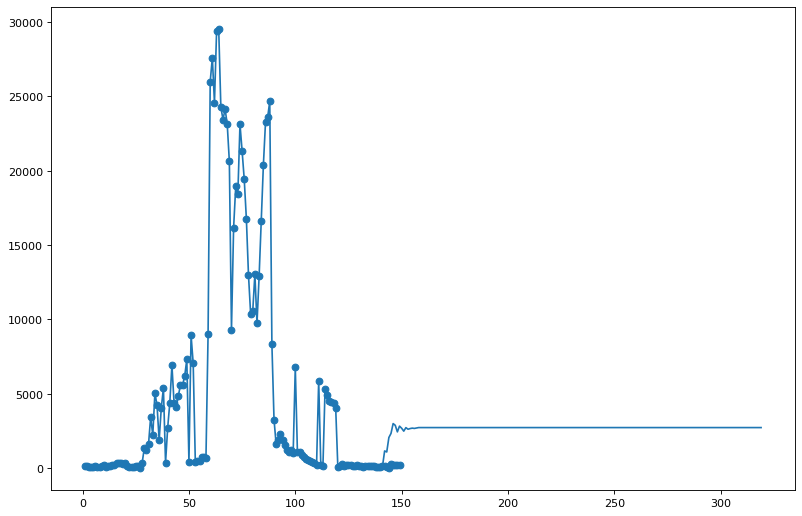

In [ ]:
#Draw the diagram
from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80)
x = list(range(1,len(New_CHN)+1))
y = New_CHN
myline=list(range(1,len(New_CHN2)+1))
plt.scatter(x, y)
plt.plot(myline,New_CHN2)
plt.show() 

In [ ]:
#Get the value of last ten numbers of new_cases as test value
New_CHN2[139:149] 

[146.48616666666666,
 128.082,
 1164.3823333333332,
 1094.0231666666668,
 2066.2581666666665,
 2340.2916666666665,
 3002.89,
 2886.02,
 2445.29,
 2831.57]

In [ ]:
# calculate the absolute value which may used to compare the accuracy with  other models.
abs(last_10[0]-New_CHN2[139])+abs(last_10[1]-New_CHN2[140])+abs(last_10[2]-New_CHN2[141])+abs(last_10[3]-New_CHN2[142])+abs(last_10[4]-New_CHN2[143])+abs(last_10[5]-New_CHN2[144])+abs(last_10[6]-New_CHN2[145])+abs(last_10[7]-New_CHN2[146])+abs(last_10[8]-New_CHN2[147])+abs(last_10[9]-New_CHN2[148])

16464.1295

In [ ]:
# AdaBoostRegressor
model = AdaBoostRegressor(random_state=0, n_estimators=100)
model.fit(input_data, output_data)

AdaBoostRegressor(n_estimators=100, random_state=0)

In [ ]:
model.predict([[199.0, 203.0, 218.0, 205.0]])

array([2044.33333333])

In [ ]:
# make a copy 
New_CHN2=New_CHN[:-10].copy()
print(New_CHN2)

[127.0, 155.0, 98.0, 112.0, 110.0, 142.0, 110.0, 111.0, 177.0, 218.0, 65.0, 180.0, 164.0, 239.0, 239.0, 323.0, 323.0, 326.0, 263.0, 359.0, 121.0, 77.0, 96.0, 110.0, 151.0, 143.0, 46.0, 355.0, 1349.0, 1225.0, 1620.0, 3438.0, 2228.0, 5062.0, 4223.0, 1890.0, 4053.0, 5396.0, 371.0, 2710.0, 4393.0, 6923.0, 4408.0, 4108.0, 4843.0, 5594.0, 5584.0, 6195.0, 7315.0, 411.0, 8943.0, 7042.0, 412.0, 470.0, 518.0, 748.0, 761.0, 666.0, 9040.0, 25988.0, 27584.0, 24560.0, 29387.0, 29520.0, 24281.0, 23436.0, 24131.0, 23134.0, 20615.0, 9309.0, 16165.0, 18942.0, 18453.0, 23119.0, 21316.0, 19413.0, 16772.0, 12981.0, 10392.0, 10565.0, 13042.0, 9737.0, 12925.0, 16649.0, 20378.0, 23255.0, 23576.0, 24669.0, 8360.0, 3269.0, 1616.0, 1913.0, 2301.0, 1887.0, 1580.0, 1198.0, 1106.0, 1197.0, 1002.0, 6775.0, 1109.0, 1112.0, 871.0, 782.0, 592.0, 563.0, 473.0, 399.0, 326.0, 218.0, 5886.0, 195.0, 155.0, 5347.0, 4924.0, 4503.0, 4467.0, 4407.0, 4037.0, 93.0, 180.0, 263.0, 176.0, 220.0, 205.0, 209.0, 158.0, 134.0, 202.0, 15

In [ ]:
New_CHN2[-4:]
model.predict([New_CHN2[-4:]])[0]

1778.8

In [ ]:
for i in range(180):
  prediction = model.predict([New_CHN2[-4:]])[0]
  New_CHN2.append(prediction) 

In [ ]:
print(New_CHN2)

[127.0, 155.0, 98.0, 112.0, 110.0, 142.0, 110.0, 111.0, 177.0, 218.0, 65.0, 180.0, 164.0, 239.0, 239.0, 323.0, 323.0, 326.0, 263.0, 359.0, 121.0, 77.0, 96.0, 110.0, 151.0, 143.0, 46.0, 355.0, 1349.0, 1225.0, 1620.0, 3438.0, 2228.0, 5062.0, 4223.0, 1890.0, 4053.0, 5396.0, 371.0, 2710.0, 4393.0, 6923.0, 4408.0, 4108.0, 4843.0, 5594.0, 5584.0, 6195.0, 7315.0, 411.0, 8943.0, 7042.0, 412.0, 470.0, 518.0, 748.0, 761.0, 666.0, 9040.0, 25988.0, 27584.0, 24560.0, 29387.0, 29520.0, 24281.0, 23436.0, 24131.0, 23134.0, 20615.0, 9309.0, 16165.0, 18942.0, 18453.0, 23119.0, 21316.0, 19413.0, 16772.0, 12981.0, 10392.0, 10565.0, 13042.0, 9737.0, 12925.0, 16649.0, 20378.0, 23255.0, 23576.0, 24669.0, 8360.0, 3269.0, 1616.0, 1913.0, 2301.0, 1887.0, 1580.0, 1198.0, 1106.0, 1197.0, 1002.0, 6775.0, 1109.0, 1112.0, 871.0, 782.0, 592.0, 563.0, 473.0, 399.0, 326.0, 218.0, 5886.0, 195.0, 155.0, 5347.0, 4924.0, 4503.0, 4467.0, 4407.0, 4037.0, 93.0, 180.0, 263.0, 176.0, 220.0, 205.0, 209.0, 158.0, 134.0, 202.0, 15

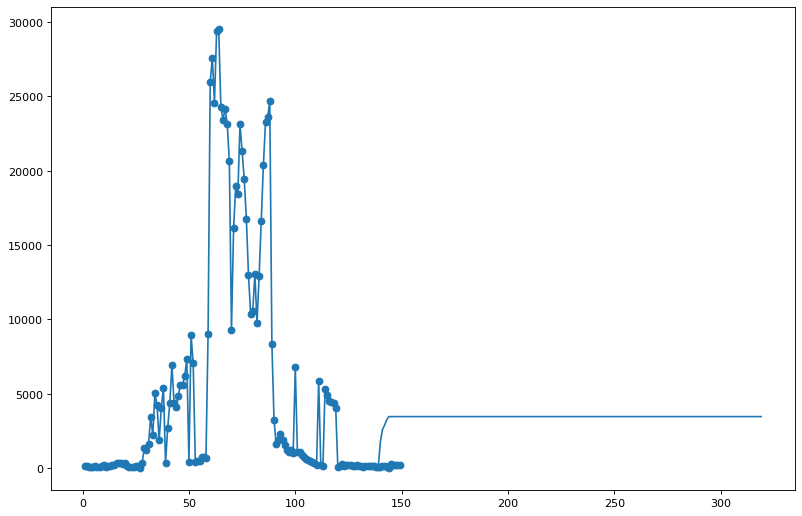

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80)
x = list(range(1,len(New_CHN)+1))
y = New_CHN
myline=list(range(1,len(New_CHN2)+1))
plt.scatter(x, y)
plt.plot(myline,New_CHN2)
plt.show() 

In [ ]:
#Get the value of last ten numbers of new_cases as test value
New_CHN2[139:149] 

[1778.8,
 2601.4,
 2902.4444444444443,
 3257.0714285714284,
 3471.75,
 3471.75,
 3471.75,
 3471.75,
 3471.75,
 3471.75]

In [ ]:
# calculate the absolute value which may used to compare the accuracy with  other models.
abs(last_10[0]-New_CHN2[139])+abs(last_10[1]-New_CHN2[140])+abs(last_10[2]-New_CHN2[141])+abs(last_10[3]-New_CHN2[142])+abs(last_10[4]-New_CHN2[143])+abs(last_10[5]-New_CHN2[144])+abs(last_10[6]-New_CHN2[145])+abs(last_10[7]-New_CHN2[146])+abs(last_10[8]-New_CHN2[147])+abs(last_10[9]-New_CHN2[148])

29711.215873015874

In [ ]:
# GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=0)
model.fit(input_data, output_data)

GradientBoostingRegressor(random_state=0)

In [ ]:
# make a copy 
New_CHN2=New_CHN[:-10].copy()
print(New_CHN2)

[127.0, 155.0, 98.0, 112.0, 110.0, 142.0, 110.0, 111.0, 177.0, 218.0, 65.0, 180.0, 164.0, 239.0, 239.0, 323.0, 323.0, 326.0, 263.0, 359.0, 121.0, 77.0, 96.0, 110.0, 151.0, 143.0, 46.0, 355.0, 1349.0, 1225.0, 1620.0, 3438.0, 2228.0, 5062.0, 4223.0, 1890.0, 4053.0, 5396.0, 371.0, 2710.0, 4393.0, 6923.0, 4408.0, 4108.0, 4843.0, 5594.0, 5584.0, 6195.0, 7315.0, 411.0, 8943.0, 7042.0, 412.0, 470.0, 518.0, 748.0, 761.0, 666.0, 9040.0, 25988.0, 27584.0, 24560.0, 29387.0, 29520.0, 24281.0, 23436.0, 24131.0, 23134.0, 20615.0, 9309.0, 16165.0, 18942.0, 18453.0, 23119.0, 21316.0, 19413.0, 16772.0, 12981.0, 10392.0, 10565.0, 13042.0, 9737.0, 12925.0, 16649.0, 20378.0, 23255.0, 23576.0, 24669.0, 8360.0, 3269.0, 1616.0, 1913.0, 2301.0, 1887.0, 1580.0, 1198.0, 1106.0, 1197.0, 1002.0, 6775.0, 1109.0, 1112.0, 871.0, 782.0, 592.0, 563.0, 473.0, 399.0, 326.0, 218.0, 5886.0, 195.0, 155.0, 5347.0, 4924.0, 4503.0, 4467.0, 4407.0, 4037.0, 93.0, 180.0, 263.0, 176.0, 220.0, 205.0, 209.0, 158.0, 134.0, 202.0, 15

In [ ]:
for i in range(180):
  prediction = model.predict([New_CHN2[-4:]])[0]
  New_CHN2.append(prediction) 

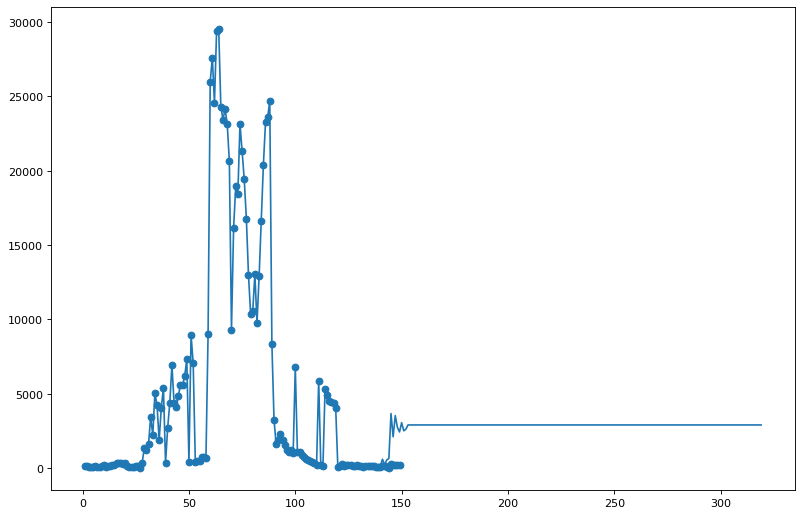

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80)
x = list(range(1,len(New_CHN)+1))
y = New_CHN
myline=list(range(1,len(New_CHN2)+1))
plt.scatter(x, y)
plt.plot(myline,New_CHN2)
plt.show() 

In [ ]:
#Get the value of last ten numbers of new_cases as test value
New_CHN2[139:149] 

[162.72313586468204,
 605.6231999719524,
 228.03062769372045,
 557.2289410804675,
 656.2990891493936,
 3676.1247210448373,
 2113.34490433355,
 3535.964591937591,
 2756.6851385707346,
 2438.5072544083696]

In [ ]:
# calculate the absolute value which may used to compare the accuracy with  other models.
abs(last_10[0]-New_CHN2[139])+abs(last_10[1]-New_CHN2[140])+abs(last_10[2]-New_CHN2[141])+abs(last_10[3]-New_CHN2[142])+abs(last_10[4]-New_CHN2[143])+abs(last_10[5]-New_CHN2[144])+abs(last_10[6]-New_CHN2[145])+abs(last_10[7]-New_CHN2[146])+abs(last_10[8]-New_CHN2[147])+abs(last_10[9]-New_CHN2[148])

15071.531604055297

In [ ]:
# DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=0)
model.fit(input_data, output_data)

DecisionTreeRegressor(random_state=0)

In [ ]:
# make a copy 
New_CHN2=New_CHN[:-10].copy()
print(New_CHN2)

[127.0, 155.0, 98.0, 112.0, 110.0, 142.0, 110.0, 111.0, 177.0, 218.0, 65.0, 180.0, 164.0, 239.0, 239.0, 323.0, 323.0, 326.0, 263.0, 359.0, 121.0, 77.0, 96.0, 110.0, 151.0, 143.0, 46.0, 355.0, 1349.0, 1225.0, 1620.0, 3438.0, 2228.0, 5062.0, 4223.0, 1890.0, 4053.0, 5396.0, 371.0, 2710.0, 4393.0, 6923.0, 4408.0, 4108.0, 4843.0, 5594.0, 5584.0, 6195.0, 7315.0, 411.0, 8943.0, 7042.0, 412.0, 470.0, 518.0, 748.0, 761.0, 666.0, 9040.0, 25988.0, 27584.0, 24560.0, 29387.0, 29520.0, 24281.0, 23436.0, 24131.0, 23134.0, 20615.0, 9309.0, 16165.0, 18942.0, 18453.0, 23119.0, 21316.0, 19413.0, 16772.0, 12981.0, 10392.0, 10565.0, 13042.0, 9737.0, 12925.0, 16649.0, 20378.0, 23255.0, 23576.0, 24669.0, 8360.0, 3269.0, 1616.0, 1913.0, 2301.0, 1887.0, 1580.0, 1198.0, 1106.0, 1197.0, 1002.0, 6775.0, 1109.0, 1112.0, 871.0, 782.0, 592.0, 563.0, 473.0, 399.0, 326.0, 218.0, 5886.0, 195.0, 155.0, 5347.0, 4924.0, 4503.0, 4467.0, 4407.0, 4037.0, 93.0, 180.0, 263.0, 176.0, 220.0, 205.0, 209.0, 158.0, 134.0, 202.0, 15

In [ ]:
New_CHN2[-4:]
model.predict([New_CHN2[-4:]])[0]

76.0

In [ ]:
for i in range(180):
  prediction = model.predict([New_CHN2[-4:]])[0]
  New_CHN2.append(prediction) 

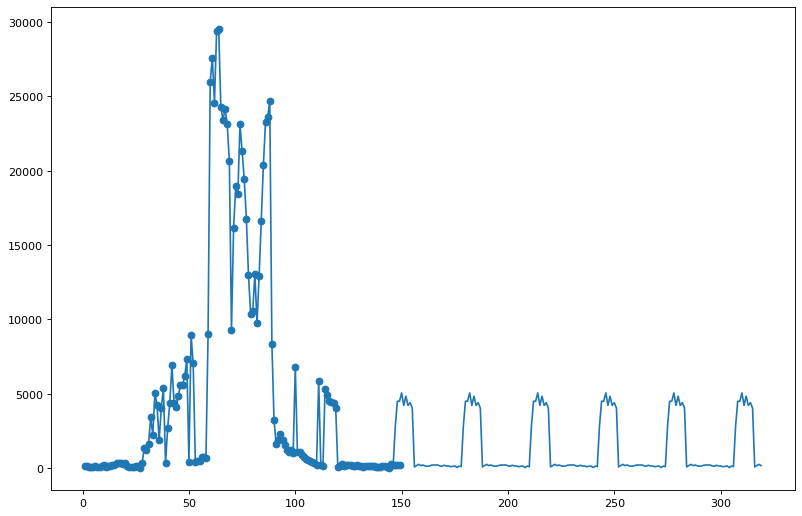

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80)
x = list(range(1,len(New_CHN)+1))
y = New_CHN
myline=list(range(1,len(New_CHN2)+1))
plt.scatter(x, y)
plt.plot(myline,New_CHN2)
plt.show() 

In [ ]:
#Get the value of last ten numbers of new_cases as test value
New_CHN2[139:149]

[76.0, 120.0, 151.0, 143.0, 46.0, 76.0, 133.0, 2793.0, 4503.0, 4503.0]

In [ ]:
# calculate the absolute value which may used to compare the accuracy with  other models.
abs(last_10[0]-New_CHN2[139])+abs(last_10[1]-New_CHN2[140])+abs(last_10[2]-New_CHN2[141])+abs(last_10[3]-New_CHN2[142])+abs(last_10[4]-New_CHN2[143])+abs(last_10[5]-New_CHN2[144])+abs(last_10[6]-New_CHN2[145])+abs(last_10[7]-New_CHN2[146])+abs(last_10[8]-New_CHN2[147])+abs(last_10[9]-New_CHN2[148])

11617.0

In [ ]:
#similarity: relatively stable. the control of covid will work fine for these four models.

In [ ]:
# Absolute value compare(error)
# RandomForestRegressor 16464.1295, AdaBoostRegressor 29711.215873015874 
# GradientBoostingRegressor 15071.531604055297, DecisionTreeRegressor 11617.0
# 11617.0 < 15071.531604055297 < 16464.1295 < 29711.215873015874
# DecisionTreeRegressor is the most accurate model from those four models to predict.
# from the graph, we can see that the new_cases of covid in China will become seasonal. Based on that, I think the covid in China at the end of 2022 
# will be controled in a range, it will not end completely, but it will not be a big problem towards society.

In [ ]:
# potential  improvements to our model: we can try increasing the number of lookback. 2. we can try using more recent data to train the model.